In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbs
from elephant.statistics import lv, isi

import validation_functions as vf

matplotlib.rcParams['figure.figsize'] = [16, 12]
sbs.set(font_scale=1.5)

In [2]:
data = vf.get_all_data()

In [3]:
np.shape(data)

(6, 120)

# Kruskal-Wallis of LV

In [4]:
# Filter the data into excitatory and inhibitory neurons
exc = [vf.filter_data(x, neuron_type='exc', behavior=None) for x in data]
inh = [vf.filter_data(x, neuron_type='inh', behavior=None) for x in data]

In [5]:
print(np.shape(exc))
print(np.shape(inh))

(6, 90)
(6, 30)


In [6]:
exc_isi = [[isi(x) for x in dataset] for dataset in exc]
print(np.shape(exc_isi))
inh_isi = [[isi(x) for x in dataset] for dataset in inh]
print(np.shape(inh_isi))

(6, 90)
(6, 30)


In [7]:
exc_lv = [[lv(x) for x in dataset] for dataset in exc_isi]
inh_lv = [[lv(x) for x in dataset] for dataset in inh_isi]
print(np.shape(exc_lv))
print(exc_lv[0][0])

(6, 90)
0.7636546718258976


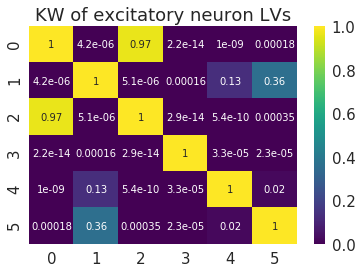

In [8]:
kw_stats = vf.kw_pairwise(exc_lv, title='KW of excitatory neuron LVs')

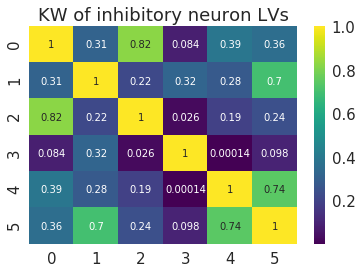

In [9]:
kw_stats = vf.kw_pairwise(inh_lv, title='KW of inhibitory neuron LVs')

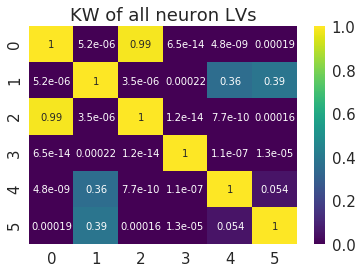

In [10]:
filtered = [vf.filter_data(x, neuron_type=None, behavior=None) for x in data]
total_isi = [[isi(x) for x in dataset] for dataset in filtered]
total_lv = [[lv(x) for x in dataset if x != []] for dataset in total_isi]
kw_stats = vf.kw_pairwise(total_lv, title='KW of all neuron LVs')

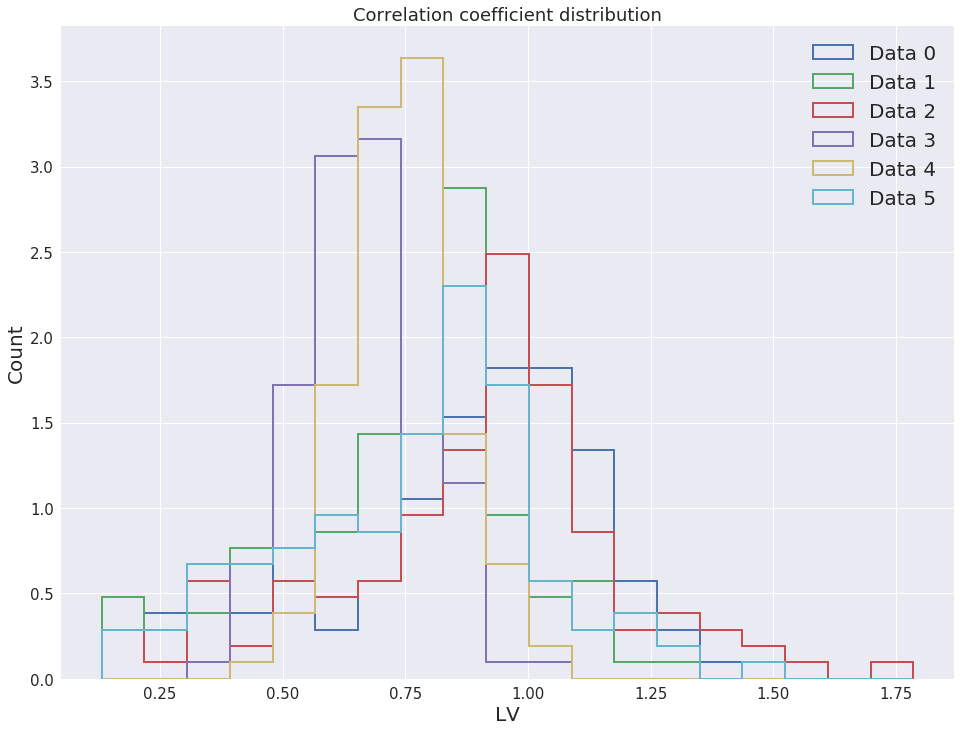

In [18]:
plt.clf()
matplotlib.rcParams['figure.figsize'] = [16, 12]
bins = np.linspace(np.min(total_lv), np.max(total_lv), 20)

for idx, lv in enumerate(total_lv):
    plt.hist(lv, bins=bins, histtype='step', lw=2, label='Data %s' % idx, density=True)

plt.legend(loc='best', fontsize=20)
plt.xlabel('LV', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Correlation coefficient distribution')
plt.savefig('lv_hist.png')
plt.show()
